In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train_data.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [3]:
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
11710,On Two Fronts: Latinos and Vietnam (2015),documentary,Focuses on how the Vietnam impacted the Latin...
11711,The New Hustle (2017),documentary,The story of three of Australia's fastest gro...
11712,"""Tawk"" (2014)",talk-show,We first spotted Parker AKA Dumbfoundead when...
11713,The Reward of the Faithless (1917),drama,"Guido Capanelli is an adventurer, his good lo..."


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11714 entries, 1 to 11714
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        11714 non-null  object
 1   GENRE        11714 non-null  object
 2   DESCRIPTION  11714 non-null  object
dtypes: object(3)
memory usage: 366.1+ KB


In [5]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [6]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,11714,11714,11714
unique,11714,27,11706
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,2895,3


In [7]:
train_data.duplicated().sum()

0

In [8]:
train_data['GENRE'].value_counts()

GENRE
drama           2895
documentary     2844
comedy          1616
short           1106
horror           459
thriller         366
action           287
western          240
reality-tv       188
family           174
adventure        167
music            160
adult            142
romance          140
sci-fi           136
animation        108
sport             95
crime             93
talk-show         89
fantasy           80
mystery           65
musical           60
biography         52
history           49
game-show         41
news              36
war               26
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

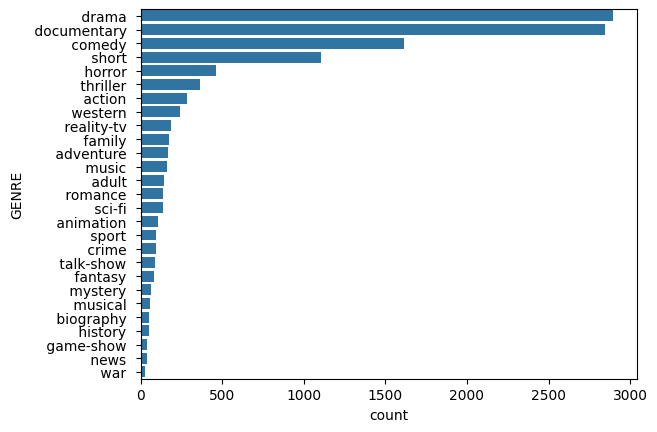

In [14]:
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

In [24]:
test_data = pd.read_csv('test_data.txt', sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [25]:
test_data

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
12044,12045,Film 1 (1999),Willem W. walks with his father to court on t...
12045,12046,Al-khoroug lel-nahar (2012),Those who have fully enjoyed their bodies can...
12046,12047,My Friend the King (1932),A taxi driver becomes involved in a plot to k...
12047,12048,"""TCM Spotlight: Pre-Code Classics"" (2014)",Pre-Code Hollywood is generally considered to...


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12049 entries, 0 to 12048
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           12049 non-null  int64 
 1   TITLE        12049 non-null  object
 2   DESCRIPTION  12049 non-null  object
dtypes: int64(1), object(2)
memory usage: 282.5+ KB


In [27]:
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [29]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\XPS
[nltk_data]     13\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
ps  = PorterStemmer()

In [18]:
import string

In [31]:
def data_process(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = " ".join([i for i in text.split() if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stopwords.words('english') and len(i)>2])
    text = " ".join([ps.stem(i) for i in text.split()])
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [32]:
train_data["transform_desc"] = train_data["DESCRIPTION"].apply(data_process)

In [33]:
train_data

,TITLE,GENRE,DESCRIPTION,transform_desc
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...
...,...,...,...,...
11710,On Two Fronts: Latinos and Vietnam (2015),documentary,Focuses on how the Vietnam impacted the Latin...,focus vietnam impact latino mexicano commun so...
11711,The New Hustle (2017),documentary,The story of three of Australia's fastest gro...,stori three australia fastest grow startup saf...
11712,"""Tawk"" (2014)",talk-show,We first spotted Parker AKA Dumbfoundead when...,first spot parker aka dumbfoundead saw kick bu...
11713,The Reward of the Faithless (1917),drama,"Guido Capanelli is an adventurer, his good lo...",guido capanelli adventur good look courtli bea...


In [34]:
test_data["transform_desc"] = test_data["DESCRIPTION"].apply(data_process)

In [35]:
test_data

,ID,TITLE,DESCRIPTION,transform_desc
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane love life car apart job especi girlfrien...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughti child three belong w...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin famili shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die spoken brother year seriou cancer d...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern martial art superstar bruce lee a...
...,...,...,...,...
12044,12045,Film 1 (1999),Willem W. walks with his father to court on t...,willem walk father court first day agusta tria...
12045,12046,Al-khoroug lel-nahar (2012),Those who have fully enjoyed their bodies can...,fulli enjoy bodi submiss never surviv slaveri ...
12046,12047,My Friend the King (1932),A taxi driver becomes involved in a plot to k...,taxi driver becom involv plot kidnap ruritania...
12047,12048,"""TCM Spotlight: Pre-Code Classics"" (2014)",Pre-Code Hollywood is generally considered to...,pre code hollywood gener consid era american f...


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [78]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(train_data["transform_desc"])
X_test_given = vectorize.transform(test_data["transform_desc"])

In [79]:
X = X_train
y = train_data["GENRE"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [80]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [93]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [97]:
gnb.fit(X_train.toarray(), Y_train)
y_pred1 = gnb.predict(X_test.toarray())

mnb.fit(X_train.toarray(), Y_train)
y_pred2 = mnb.predict(X_test.toarray())

bnb.fit(X_train.toarray(), Y_train)
y_pred3 = bnb.predict(X_test.toarray())

In [98]:
y_pred = model.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred, average = 'macro'))

print(accuracy_score(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1, average = 'macro'))

print(accuracy_score(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2, average = 'macro'))

print(accuracy_score(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3, average = 'macro'))


0.49167733674775926
0.2534503556696555
0.3213828425096031
0.1772728276128023
0.42765685019206146
0.06215022091310751
0.4468629961587708
0.10667898294962422


C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: Unde

In [100]:
print(model.score(X_train, Y_train))
print(gnb.score(X_train.toarray(), Y_train))
print(mnb.score(X_train.toarray(), Y_train))
print(bnb.score(X_train.toarray(), Y_train))

0.8925408174154306
0.9632910041617757
0.47337530679756695
0.5238501760751254


In [101]:
pd.DataFrame(y_pred)

,0
0,drama
1,drama
2,drama
3,drama
4,drama
...,...
2338,documentary
2339,documentary
2340,drama
2341,drama


In [111]:
# test_data["Predict_genre"] = pd.DataFrame(model.predict(X_test_given))
test_data["Predict_genre"] = pd.DataFrame(gnb.predict(X_test_given.toarray()))

In [118]:
test_data["Predict_genre_svc"] = pd.DataFrame(model.predict(X_test_given))

In [120]:
test_data

,ID,TITLE,DESCRIPTION,transform_desc,Predict_genre,Predict_genre_svc
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane love life car apart job especi girlfrien...,documentary,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughti child three belong w...,drama,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin famili shepherd north tran...,documentary,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die spoken brother year seriou cancer d...,drama,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern martial art superstar bruce lee a...,drama,drama
...,...,...,...,...,...,...
12044,12045,Film 1 (1999),Willem W. walks with his father to court on t...,willem walk father court first day agusta tria...,documentary,drama
12045,12046,Al-khoroug lel-nahar (2012),Those who have fully enjoyed their bodies can...,fulli enjoy bodi submiss never surviv slaveri ...,comedy,drama
12046,12047,My Friend the King (1932),A taxi driver becomes involved in a plot to k...,taxi driver becom involv plot kidnap ruritania...,comedy,drama
12047,12048,"""TCM Spotlight: Pre-Code Classics"" (2014)",Pre-Code Hollywood is generally considered to...,pre code hollywood gener consid era american f...,documentary,documentary


In [104]:
test_data_sol = pd.read_csv('test_data_solution.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [105]:
test_data_sol

,TITLE,GENRE,DESCRIPTION
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
12045,Film 1 (1999),drama,Willem W. walks with his father to court on t...
12046,Al-khoroug lel-nahar (2012),drama,Those who have fully enjoyed their bodies can...
12047,My Friend the King (1932),comedy,A taxi driver becomes involved in a plot to k...
12048,"""TCM Spotlight: Pre-Code Classics"" (2014)",talk-show,Pre-Code Hollywood is generally considered to...


In [106]:
def comp(pred, actual):
    if(pred.Predict_genre == actual.GENRE): 
        return 1
    return 0

In [113]:
results = []
sum = 0;
for row1, row2 in zip(test_data.itertuples(index=False), test_data_sol.itertuples(index=False)):
    result = comp(row1, row2)
    results.append(result)
results = pd.DataFrame(np.array(results))

In [114]:
results.value_counts()

0
0    8080
1    3969
Name: count, dtype: int64

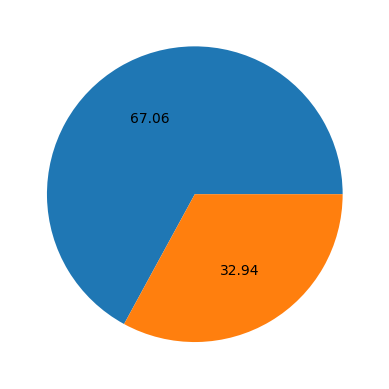

In [115]:
plt.pie(results.value_counts(), autopct="%0.2f")
plt.show()

In [119]:
def comp_svc(pred, actual):
    if(pred.Predict_genre_svc == actual.GENRE): 
        return 1
    return 0

In [121]:
results_svc = []
for row1, row2 in zip(test_data.itertuples(index=False), test_data_sol.itertuples(index=False)):
    result = comp_svc(row1, row2)
    results_svc.append(result)
results_svc = pd.DataFrame(np.array(results_svc))

In [122]:
results_svc.value_counts()

0
1    6090
0    5959
Name: count, dtype: int64

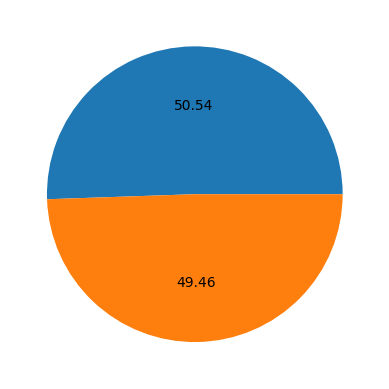

In [123]:
plt.pie(results_svc.value_counts(), autopct="%0.2f")
plt.show()

In [91]:
import pickle

In [124]:
pickle.dump(vectorize, open('vectorizer.pkl', 'wb'))
pickle.dump(gnb, open('model.pkl', 'wb'))